In [1]:
import pathlib
import imageio
import skimage
import numpy as np
import os
from os.path import join
import glob
import cv2
from scipy.misc import imsave

TRAIN_PATH = 'C:\\Users/Rick&Morty\\Workspace\\nuclei_data\\stage1_train\\'
OUTPUTS_PATH = 'C:\\Users/Rick&Morty\\Workspace\\nuclei_data\\outputs\\'
training_ids = os.listdir(TRAIN_PATH)
training_image_paths = [glob.glob(join(TRAIN_PATH, training_id, "images", "*"))[0] for training_id in training_ids]

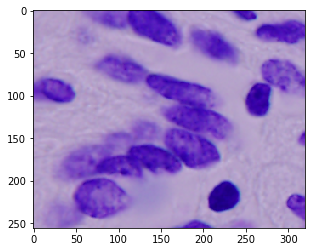

In [8]:
import matplotlib.pyplot as plt
import cv2

im_path = join(TRAIN_PATH, "709e094e39629a9ca21e187f007b331074694e443db40289447c1111f7e267e7/images/709e094e39629a9ca21e187f007b331074694e443db40289447c1111f7e267e7.png")
im = imageio.imread(str(im_path))

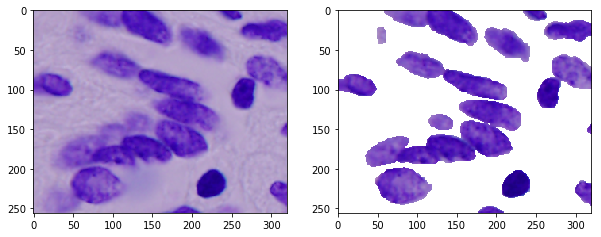

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
ax1.imshow(im)
ax2.imshow(tt)

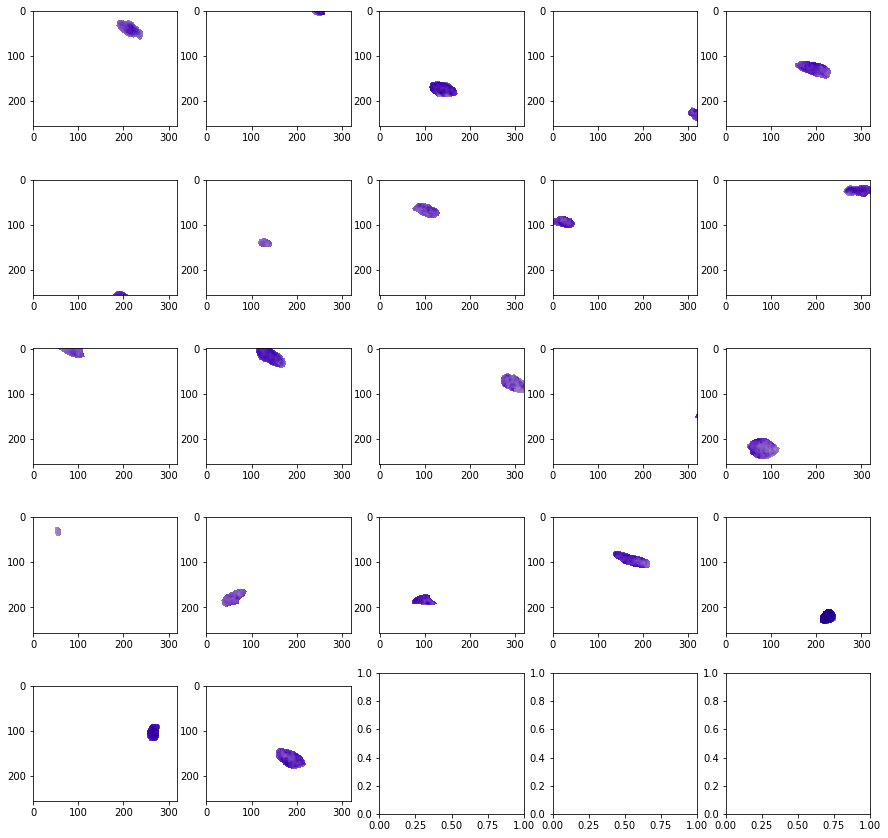

In [14]:
arr = np.array(im[:,:,0:2])
mask_dir = join(TRAIN_PATH, "709e094e39629a9ca21e187f007b331074694e443db40289447c1111f7e267e7/masks")
mask_ids = os.listdir(mask_dir)
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
i = 0
tt = np.zeros((256,320,4), np.uint8)
for mask_id in mask_ids:
    mask_path = join(mask_dir, mask_id)
    mask = imageio.imread(str(mask_path))
    res = cv2.bitwise_and(im, im, mask = mask)
    tt = cv2.add(tt, res)
    ax = axes[i // 5, i % 5]
    ax.imshow(res)
    i = i + 1

In [2]:
from skimage.color import rgb2gray

n_gray = 0
n_rgb = 0

for im_path in training_image_paths:
    im = imageio.imread(str(im_path))
    (filepath, filename) = os.path.split(im_path)
    #print(filepath)
    #print(filename)
    mean_R = np.mean(im[:, :, 0])
    mean_G = np.mean(im[:, :, 1])
    mean_B = np.mean(im[:, :, 2])
    if mean_R == mean_G and mean_R == mean_B:
        #print("Gray image")
        savename = os.path.join(OUTPUTS_PATH, "gray", filename)
        n_gray = n_gray + 1
        # print(savename)
        # imsave(savename, im)
    else:
        # print("RGB image")
        # savename = os.path.join(OUTPUTS_PATH, "rgb", filename)
        # im_gray = skimage.color.rgb2gray(im)
        im_red = im[:,:,0]
        im_green = im[:,:,1]
        im_blue = im[:,:,2]        
        # savename = os.path.join(OUTPUTS_PATH, "rgb2gray", filename)
        savered = os.path.join(OUTPUTS_PATH, "red", filename)
        savegreen = os.path.join(OUTPUTS_PATH, "green", filename)
        saveblue = os.path.join(OUTPUTS_PATH, "blue", filename)
        # print(savename)
        # imsave(savename, im_gray)
        # imsave(savered, im_red)
        # imsave(savegreen, im_green)
        # imsave(saveblue, im_blue)
        n_rgb = n_rgb + 1

print("number of gray =", n_gray, "number of rgb =", n_rgb)
            

('number of gray =', 562, 'number of rgb =', 108)


In [3]:
numberOfMasks = []
listOfRep = []

for ids in training_ids:
    rep = join(TRAIN_PATH, ids, "masks")
    n_masks = os.listdir(rep)
    n = len(n_masks)
    numberOfMasks.append(n)
    #listOfRep.append(ids)

#print(listOfRep)
#print(numberOfMasks)

(array([  4.,   3.,   1.,   2.,   7.,  11.,  15.,  19.,  15.,  22.,  18.,
         16.,   9.,  12.,  14.,  12.,  11.,  17.,  11.,  19.,  11.,  20.,
         20.,  16.,  16.,   8.,  14.,  11.,  11.,   8.,   7.,  11.,   8.,
          5.,   3.,   8.,   9.,   6.,   7.,   5.,   3.,   5.,   3.,   9.,
          2.,   5.,   4.,   3.,   6.,   4.,   3.,   5.,   5.,   4.,   5.,
          4.,   4.,   3.,   3.,   4.,   3.,   4.,   2.,   4.,   5.,   3.,
          2.,   2.,   1.,   3.,   1.,   1.,   3.,   2.,   4.,   4.,   2.,
          2.,   1.,   1.,   1.,   2.,   3.,   1.,   0.,   2.,   1.,   1.,
          3.,   2.,   1.,   2.,   0.,   1.,   0.,   1.,   1.,   2.,   1.,
          1.,   4.,   1.,   0.,   0.,   0.,   3.,   1.,   0.,   0.,   0.,
          3.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   2.,   1.,   0.,
          0.,   2.,   2.,   2.,   2.,   0.,   0.,   0.,   1.,   0.,   2.,
          2.,   1.,   1.,   2.,   0.,   1.,   0.,   2.,   2.,   0.,   0.,
          0.,   0.,   1.,   1.,   1., 

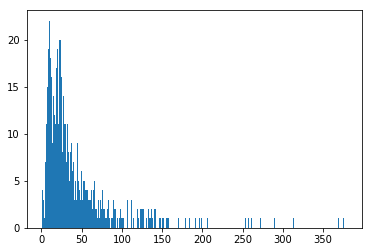

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
# bins = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400]
bins = range(1, 380, 1)
plt.hist(numberOfMasks, bins=bins, align='mid')

In [5]:
import pandas as pd
max_nuclei = max(numberOfMasks)
min_nuclei = min(numberOfMasks)
print("max=", max_nuclei, "min=", min_nuclei)

('max=', 375, 'min=', 1)


In [6]:
dataframe = pd.DataFrame(np.array(numberOfMasks).reshape(len(numberOfMasks)))
dataframe.describe()

,0
count,670.000000
mean,43.971642
std,47.962530
min,1.000000
25%,15.250000
50%,27.000000
75%,54.000000
max,375.000000


In [7]:
totNuclei=dataframe.sum()
print(totNuclei)

0    29461
dtype: int64
